In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [2]:
iris=pd.read_csv('datasets/iris.csv')
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [3]:
col = [ row['variety'] for index, row in iris.iterrows() ]
colors = {'Setosa':'red', 'Versicolor':'green', 'Virginica':'blue'}

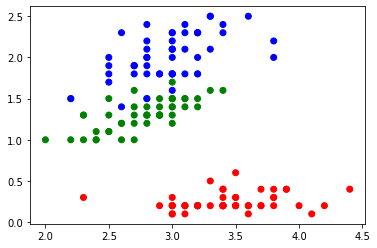

In [4]:
plt.scatter(iris['sepal.width'], iris['petal.width'], c = iris['variety'].map(colors))
plt.show()

In [5]:
km = KMeans(n_clusters=3).fit(pd.DataFrame(list(zip(iris['sepal.width'], iris['petal.width']))))

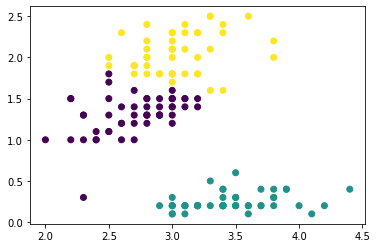

In [6]:
plt.scatter(iris['sepal.width'], iris['petal.width'], c=km.labels_)
plt.show()

In [7]:
print(iris.iloc[49][4])
print(iris.iloc[50][4])
print(iris.iloc[99][4])
print(iris.iloc[100][4])

Setosa
Versicolor
Versicolor
Virginica


In [8]:
print(km.labels_[:49])
print(np.bincount(km.labels_[:49]).argmax())

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1]
1


In [9]:
print(km.labels_[50:99])
print(np.bincount(km.labels_[50:99]).argmax())

[0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0]
0


In [10]:
print(km.labels_[100:])
print(np.bincount(km.labels_[100:]).argmax())

[2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 0 0 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]
2


Dokładność

In [11]:
x1 = km.labels_[:49] != np.bincount(km.labels_[:49]).argmax()
x1 = x1.sum()
x2 = km.labels_[50:99] != np.bincount(km.labels_[50:99]).argmax()
x2 = x2.sum()
x3 = km.labels_[100:] != np.bincount(km.labels_[100:]).argmax()
x3 = x3.sum()

In [12]:
x = x1 + x2 + x3
(len(iris) - x) / len(iris)

0.9266666666666666

Poziom błędu

In [13]:
x / len(iris)

0.07333333333333333